🎯 Desafio dia 66 — Análise de Atendimentos em Call Center

📂 Dataset: desafio_dia_66_callcenter.csv
📥 Clique aqui para baixar o CSV

🔍 Contexto:
Você trabalha no setor de qualidade de um call center e recebeu os registros de atendimento dos últimos meses. Cada linha representa uma chamada realizada, com informações sobre a data, duração, tipo e a nota de satisfação do cliente (de 1 a 5).

🛠️ Tarefas do desafio:

Tratamento de dados

- Preencha os valores ausentes na coluna duracao_minutos com a média da coluna.

Análise geral

- Qual o tipo de chamada mais comum?

- Calcule a duração média das chamadas por tipo.

Visualização de dados

- Crie um gráfico de pizza mostrando a proporção de tipos de chamadas.

Machine Learning - Classificação

- Crie um modelo de classificação (como RandomForestClassifier) para prever o nível de satisfação (satisfacao) com base em duracao_minutos e tipo_chamada (após converter para numérico com pd.get_dummies).

- Avalie a acurácia do modelo com accuracy_score.



In [34]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report

In [24]:
df = pd.read_csv("desafio_dia_66_callcenter.csv")
df.head()

,id,data_chamada,duracao_minutos,tipo_chamada,satisfacao
0,1,2024-01-01,1.7,Outros,1.0
1,2,2024-01-02,1.4,Cancelamento,2.0
2,3,2024-01-03,4.5,Suporte Técnico,3.0
3,4,2024-01-04,11.4,Outros,3.0
4,5,2024-01-05,2.2,Suporte Técnico,2.0


In [25]:
#Preencha os valores ausentes na coluna duracao_minutos com a média da coluna.
df["duracao_minutos"] = pd.to_numeric(df["duracao_minutos"], errors="coerce")
df["duracao_minutos"] = df["duracao_minutos"].fillna(df["duracao_minutos"].mean())

df["satisfacao"] = pd.to_numeric(df["satisfacao"], errors="coerce")
df["satisfacao"] = df["satisfacao"].fillna(df["satisfacao"].mode()[0])
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 250 entries, 0 to 249
Data columns (total 5 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   id               250 non-null    int64  
 1   data_chamada     250 non-null    object 
 2   duracao_minutos  250 non-null    float64
 3   tipo_chamada     250 non-null    object 
 4   satisfacao       250 non-null    float64
dtypes: float64(2), int64(1), object(2)
memory usage: 9.9+ KB


In [26]:
#Qual o tipo de chamada mais comum?
chamada_comum = df["tipo_chamada"].value_counts()
print(chamada_comum)

tipo_chamada
Suporte Técnico    80
Outros             73
Financeiro         49
Cancelamento       48
Name: count, dtype: int64


In [27]:
#Calcule a duração média das chamadas por tipo.
duracao_chamadas_media = df.groupby("tipo_chamada")["duracao_minutos"].mean()
print(duracao_chamadas_media)

tipo_chamada
Cancelamento        7.319271
Financeiro         10.845918
Outros              8.971575
Suporte Técnico     9.606875
Name: duracao_minutos, dtype: float64


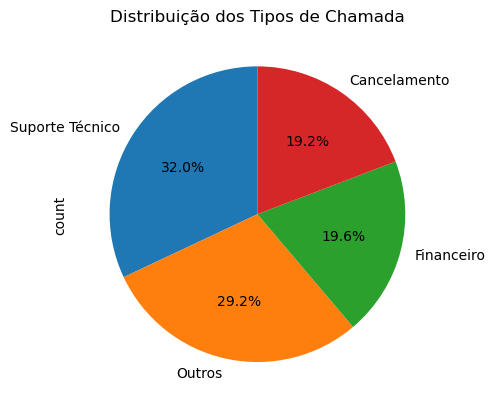

In [33]:
#Crie um gráfico de pizza mostrando a proporção de tipos de chamadas.
chamada_comum.plot.pie(autopct='%1.1f%%', startangle=90)
plt.title('Distribuição dos Tipos de Chamada')
plt.show()

In [43]:
#Crie um modelo de classificação para prever o nível de satisfação com base em duracao_minutos e tipo_chamada.
df_model = pd.get_dummies(df, columns=['tipo_chamada'], drop_first=True)

X = df_model.drop(["data_chamada", "satisfacao"], axis=1)
y = df_model["satisfacao"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

model = RandomForestClassifier(random_state=42)
model.fit(X_train, y_train)

y_pred = model.predict(X_test)
print(accuracy_score(y_test, y_pred))
print(classification_report(y_test, y_pred))

0.3333333333333333
              precision    recall  f1-score   support

         1.0       0.17      0.33      0.22         3
         2.0       0.38      0.19      0.25        16
         3.0       0.40      0.65      0.50        26
         4.0       0.21      0.15      0.18        20
         5.0       0.20      0.10      0.13        10

    accuracy                           0.33        75
   macro avg       0.27      0.28      0.26        75
weighted avg       0.31      0.33      0.30        75

